In [220]:
from edahelper import *
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot

import pandas as pd
import praw
import re
import nltk

import gensim.models
import datetime
import networkx as nx
import xgboost as xgb

import numpy as np
import seaborn as sns


import sklearn 
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import SpectralClustering

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

regex = re.compile('[^a-zA-Z ]')

#@numba.jit # unfortunately this doesn't jit easily :(
def tokenize(text, stopwords_temp):
    # given a body of text, this splits into sentences, then processes each word in the sentence to remove
    # non alphabetical characters... (? bad idea, what about users with numbers in their name)
    # returns it as a list of lists of words, the format desired by gensims word2vec
    
    sentences = []
    if type(text) == str:
        for sentence in nltk.tokenize.sent_tokenize(text):
            processed = [regex.sub('', word.lower()) for word in sentence.split(' ') ]
            processed = [word for word in processed if word not in set( ['' ])]
            processed = [word for word in processed if word not in stopwords_temp]
            sentences.append(processed)
    return sentences


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lnajt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
wsb = pd.read_pickle("../Data/subreddit_WallStreetBets/otherdata/wsb_cleaned.pkl")

In [179]:
stopwords_temp = set(stopwords.words("english"))
wsb['tokenized_title'] = wsb.title.apply(lambda x : tokenize(x, stopwords_temp))

In [180]:
wsb['tokenized_title']

0                                 [[good, time, get, blue]]
1               [[wanna, buy, call, dont, want, bet, much]]
2                                         [[buy, intu, dd]]
3         [[thought, bad, least, arent, daily, discussio...
4                                              [[remember]]
                                ...                        
960960                     [[aso, technical, breakout, dd]]
960961                                [[first, yolo, crsr]]
960962                                        [[rkt, moon]]
960963    [[therapist, told, im, delusional, thinking, g...
960964    [[cciv, lucid, motors, testing, fsd, fremont, ...
Name: tokenized_title, Length: 1260237, dtype: object

In [32]:
wsb.to_pickle("cultureshifts_preprocessed.pkl")

In [280]:
def contains_word(tokenized, target):
    for sentence in tokenized:
        if target in sentence:
            return True
    return False


In [283]:
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 200
wsb[wsb.tokenized_title.apply( lambda x : contains_word(x, 'merry'))][['id', 'date', 'title']]

,id,date,title
70130,fklrzk,2020-03-18,merry christmas
89339,fsoj7g,2020-04-01,We BEARS just want off this merry go round called life
190180,i9jlu3,2020-08-14,Merry Christmas retard
208104,im7m7z,2020-09-04,Merry Christmas you gay bears.
222936,j0ejkl,2020-09-26,Nikola is completely Fucked. Trevor Milton and his merry band of retards are finished
237824,ji3c4w,2020-10-25,The Merry Men are Everywhere
249507,jw1nei,2020-11-17,What is the collective retard strength of robin hood compared to the buying power of hedge funds and how long until Robinhood starts offering cash incentives to their band of merry mongoloid child...
260957,k15tju,2020-11-26,Merry Christmas Trevor
262483,k24c26,2020-11-27,Citron really wants to get its teeth kicked-in again (remember NIO) by calling out PLTR. Let’s show these cucks what this merry bunch of retards can do! PLTR 🚀 🚀 🚀
274443,k6znjz,2020-12-05,Where's the Opendoor/IPOB gang at? Are we going to have a public listing and a Merry Christmas?


In [35]:
wsb[['date']] = wsb.created_datetime_utc.apply(lambda x : x.date())


In [90]:


def plot_word_prop(wsb, statistic  = "sum", keyword = "gme"):
    
    wsb['contains_keyword'] =  wsb.tokenized_title.apply(lambda x : contains_word(x, keyword))
    
    agged_withgme = wsb[wsb.contains_keyword][['date', 'ups']].groupby("date").agg(statistic)
    agged_withoutgme = wsb[~wsb.contains_keyword][['date', 'ups']].groupby("date").agg(statistic)
    agged = agged_withgme/(agged_withgme + agged_withoutgme)

    fig, ax = plt.subplots(figsize=(15, 9))
    sns.lineplot(ax=ax, data = agged, x = "date", y = "ups", label = "filtered")


    #agged_withgme = wsb[wsb.contains_gme][['date', 'ups']].groupby("date").agg("count")
    #agged_withoutgme = wsb[~wsb.contains_gme][['date', 'ups']].groupby("date").agg("count")
    #agged = agged_withgme/(agged_withgme + agged_withoutgme)
    #sns.lineplot(ax=ax, data = agged, x = "date", y = "ups",color='red')


    agged = wsb[['date', 'ups']].groupby("date").agg(statistic)
    agged = agged / agged.ups.max()
    sns.lineplot(ax=ax, data = agged, x = "date", y = "ups", label = 'total', alpha = .1)
    plt.legend()

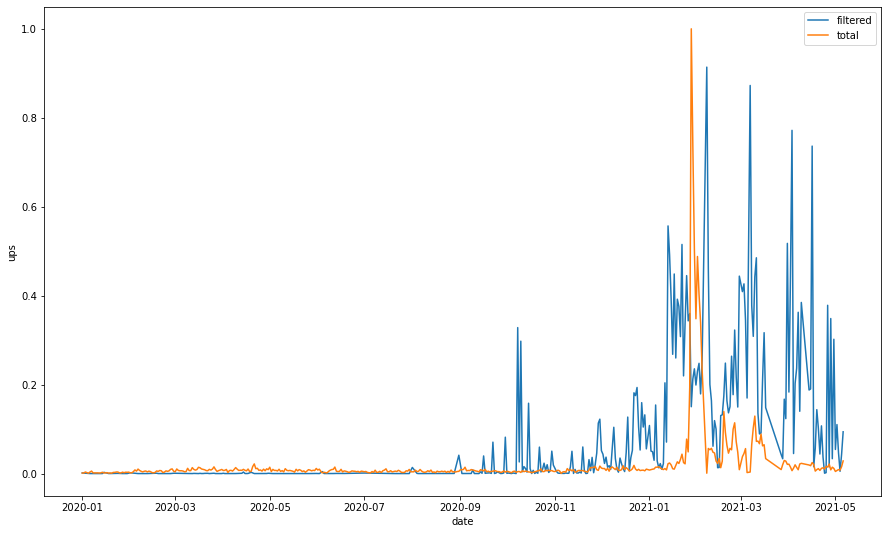

In [91]:
plot_word_prop(wsb)

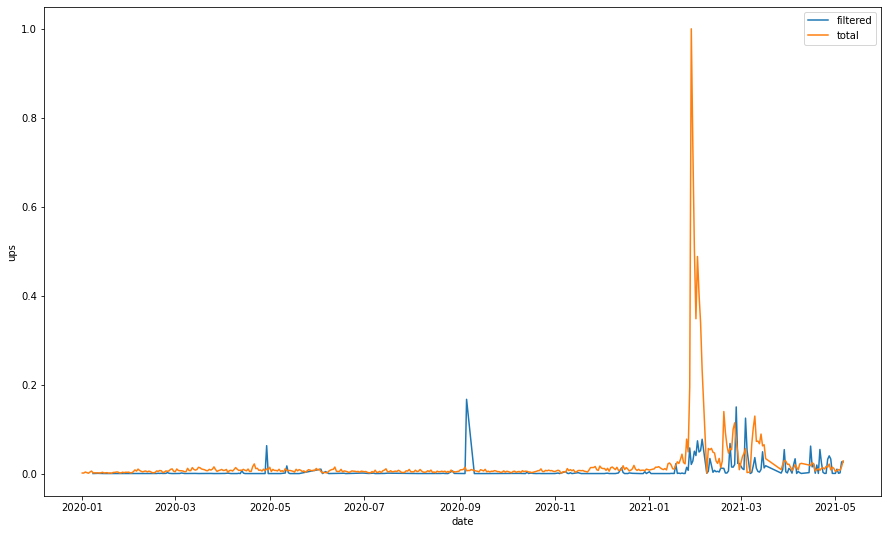

In [92]:
plot_word_prop(wsb,  keyword = "amc")

In [104]:


def plot_word_prop(wsb, keywords ,statistic  = "sum",):
    
    fig, ax = plt.subplots(figsize=(15, 9))
    for keyword in keywords:

        wsb['contains_keyword'] =  wsb.tokenized_title.apply(lambda x : contains_word(x, keyword))

        agged_withgme = wsb[wsb.contains_keyword][['date', 'ups']].groupby("date").agg(statistic)
        agged_withoutgme = wsb[~wsb.contains_keyword][['date', 'ups']].groupby("date").agg(statistic)
        agged = agged_withgme/(agged_withgme + agged_withoutgme)

        sns.lineplot(ax=ax, data = agged, x = "date", y = "ups", label = keyword)
        
    agged = wsb[['date', 'ups']].groupby("date").agg(statistic)
    agged = agged / (2 * agged.ups.max())
    sns.lineplot(ax=ax, data = agged, x = "date", y = "ups", label = 'total', alpha = .5, color = "black")

    plt.legend()

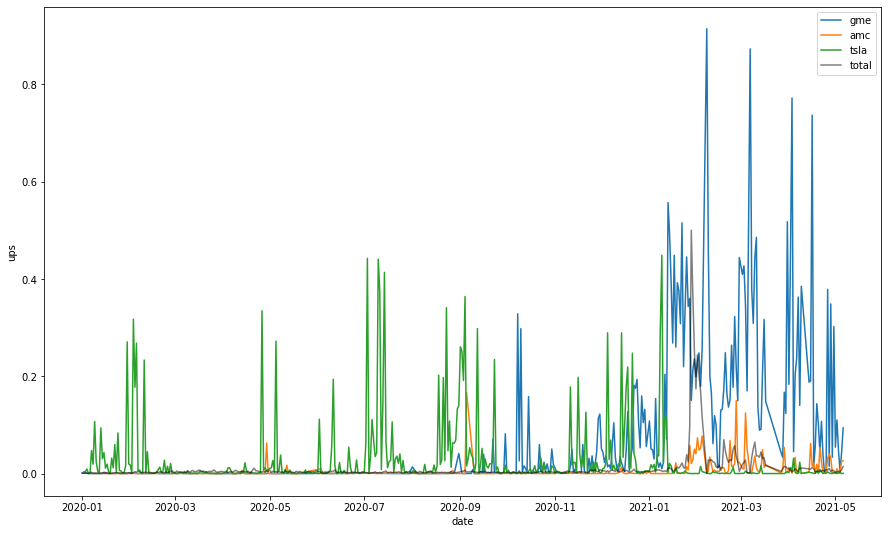

In [105]:
plot_word_prop(wsb, ['gme', 'amc', 'tsla'])

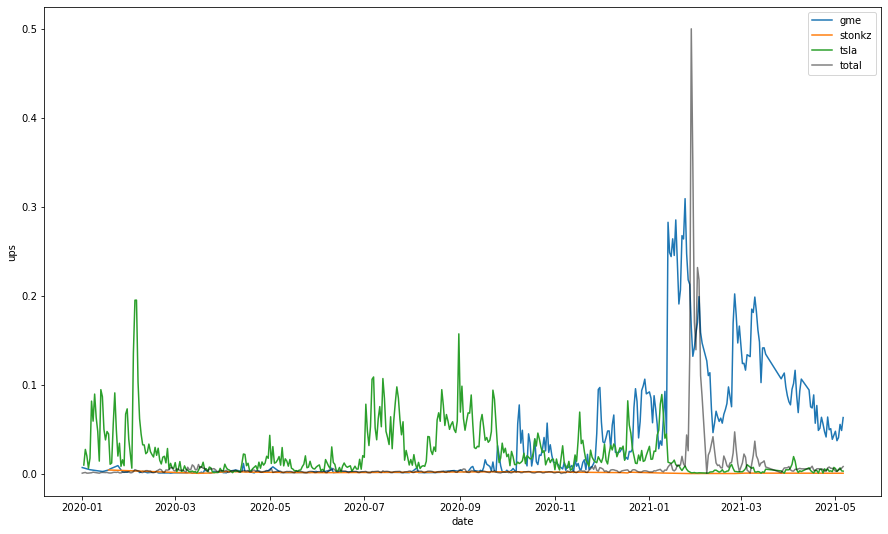

In [128]:
plot_word_prop(wsb, ['gme', 'stonkz', 'tsla'], statistic = "count")

In [107]:
wsb.date

0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-01
4         2020-01-01
             ...    
960960    2021-05-06
960961    2021-05-06
960962    2021-05-06
960963    2021-05-06
960964    2021-05-06
Name: date, Length: 1260237, dtype: object

In [205]:
def popular_words(wsb, date, numwords):
    day_df = wsb[ wsb.date == date]
    corpus = []
    for tokenized in day_df['tokenized_title']:
        corpus += tokenized

    dictionary = gensim.corpora.dictionary.Dictionary(documents = corpus)
    #dictionary.filter_n_most_frequent(len(dictionary) - numwords)
    
    
    items = list(dictionary.items())
    items.sort( key = lambda x : dictionary.cfs[x[0]], reverse = True)
    return [x[1] for x in items[:numwords]]

def frequency_dictionary(wsb, date, numwords):
    day_df = wsb[ wsb.date == date]
    corpus = []
    for tokenized in day_df['tokenized_title']:
        corpus += tokenized

    dictionary = gensim.corpora.dictionary.Dictionary(documents = corpus)
    
    return dictionary.cfs

0                      [[good, time, to, get, on, blue]]
1      [[i, wanna, buy, a, call, but, i, dont, want, ...
2                                      [[buy, intu, dd]]
3      [[if, you, thought, your, was, bad, at, least,...
4                                  [[i, will, remember]]
                             ...                        
143                                   [[happy, autists]]
144                                 [[happy, new, year]]
145    [[investing, is, easy, bro], [look, at, my, ch...
146                              [[new, year, biatches]]
147    [[the, halving, will, do, nothing, for, bitcoi...
Name: tokenized_title, Length: 148, dtype: object

In [183]:
popular_words(wsb, wsb.date.iloc[-1], 10 )

['gme', 'sos', 'moon', 'stock', 'buy', 'wsb', 'amc', 'get', 'rkt', 'k']

In [184]:
popular_words(wsb, wsb.date.iloc[0], 10 )

['new',
 'year',
 'stock',
 'stocks',
 'look',
 'years',
 'portfolio',
 'deal',
 'etrade',
 'going']

In [185]:
popular_words(wsb, wsb.date.iloc[365], 10 )

['amd', 'new', 'time', 'k', 'options', 'calls', 'year', 'money', 'first', 'im']

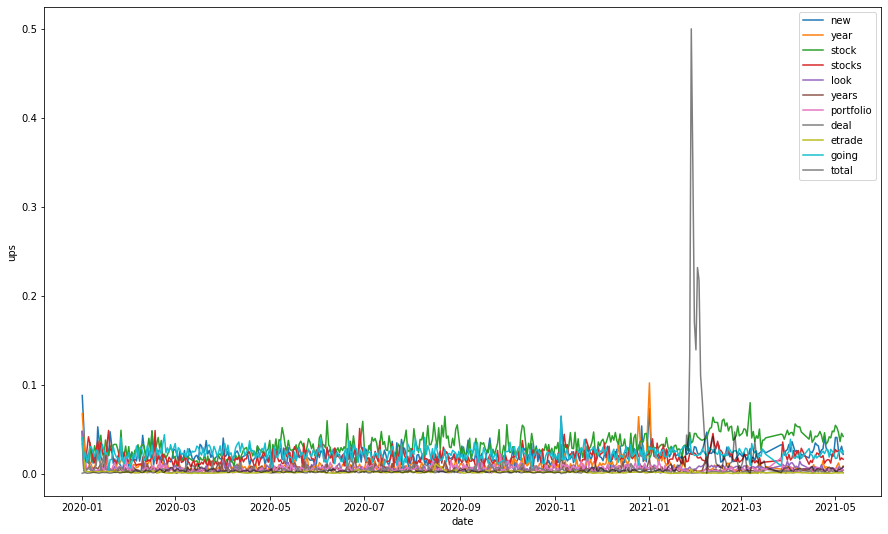

In [187]:
plot_word_prop(wsb, popular_words(wsb, wsb.date.iloc[0], 10 ), statistic = "count")

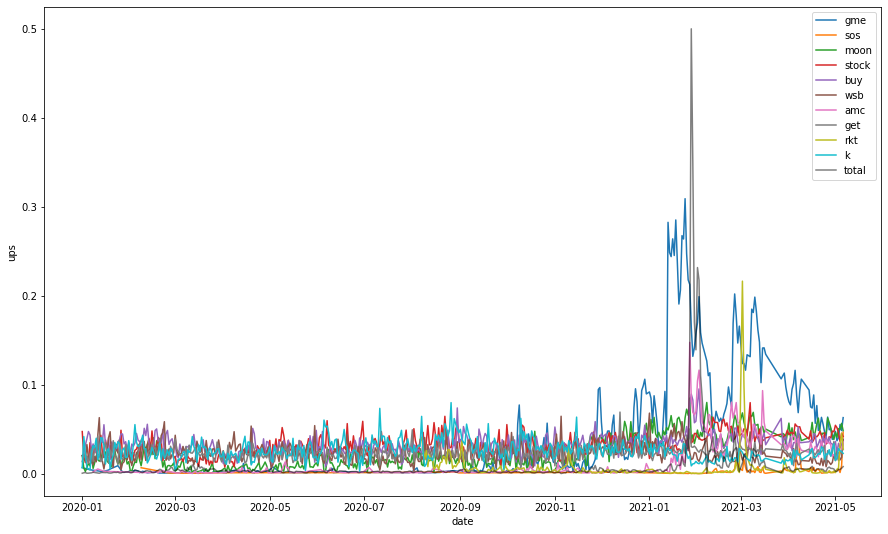

In [188]:
plot_word_prop(wsb, popular_words(wsb, wsb.date.iloc[-1], 10 ), statistic = "count")

In [191]:
wsb.date.apply( lambda x : popular_words(wsb, x, 1 )

['gme']

In [198]:
dates = sorted(list(set(wsb.date)))

In [256]:
pop_words_10 = [ popular_words(wsb, x, 200 ) for x in dates]

In [206]:
freq_dictionary = [ frequency_dictionary(wsb, x, 10 ) for x in dates]

In [255]:
pop_words_200 = [ popular_words(wsb, x, 200 ) for x in dates]

504

In [270]:
pd.options.display.max_rows = 10
pop_words = pd.DataFrame(pop_words_10, index = dates)

In [260]:
pop_words_200 = pd.DataFrame(pop_words_200, index = dates)

In [272]:
def new_memes(pop_words, pop_words_200, dates):
    delta = 1 #datetime.timedelta(days=1)
    meme_words = []
    for i in range(len(dates))[11:]:
        for word in pop_words.iloc[i]:
            if not any([word in set(pop_words_200.iloc[i - delta * k ]) for k in range(1,10) ]):
                print(i, dates[i], word)
                meme_words.append(word)
                
    return meme_words 


In [273]:
meme_words = new_memes(pop_words, pop_words_200, dates)

18 2020-01-19 plan
19 2020-01-20 mlk
25 2020-01-26 kobe
32 2020-02-02 yolos
45 2020-02-15 mascot
48 2020-02-18 plug
50 2020-02-20 ally
81 2020-03-22 rand
93 2020-04-03 questtrade
98 2020-04-08 jartek
110 2020-04-20 crude
122 2020-05-02 log
122 2020-05-02 wsbvotebot
123 2020-05-03 airlines
144 2020-05-24 dearborn
144 2020-05-24 plant
144 2020-05-24 ford
155 2020-06-04 aal
175 2020-06-24 gnc
190 2020-07-09 nvda
192 2020-07-11 future
192 2020-07-11 ama
196 2020-07-15 hacked
218 2020-08-06 rkt
243 2020-08-31 count
243 2020-08-31 crashes
244 2020-09-01 zm
261 2020-09-18 vale
275 2020-10-02 positive
276 2020-10-03 currency
276 2020-10-03 pi
281 2020-10-08 gme
286 2020-10-13 loop
309 2020-11-05 bezos
310 2020-11-06 acb
317 2020-11-13 citron
358 2020-12-24 baba
358 2020-12-24 merry
366 2021-01-02 doge
366 2021-01-02 dogecoin
378 2021-01-14 bb
383 2021-01-19 citron
401 2021-02-08 ocgn
426 2021-03-07 biggest
442 2021-04-01 fortnite
442 2021-04-01 skin
466 2021-04-29 nok


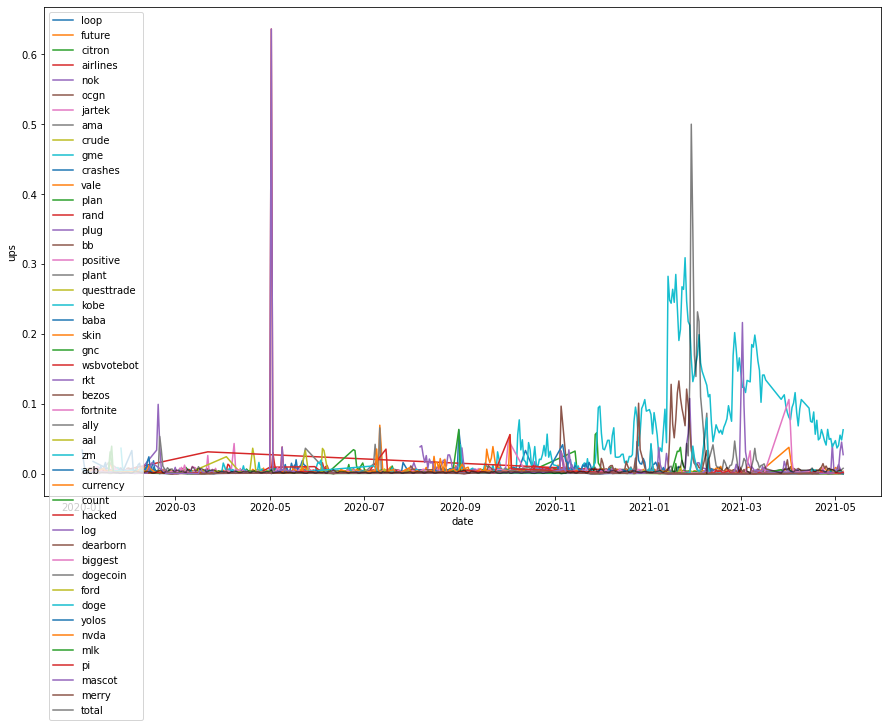

In [274]:
plot_word_prop(wsb, list(set(meme_words)), statistic = "count")

48 2020-02-18 plug
281 2020-10-08 gme
358 2020-12-24 merry
378 2021-01-14 bb
383 2021-01-19 citron


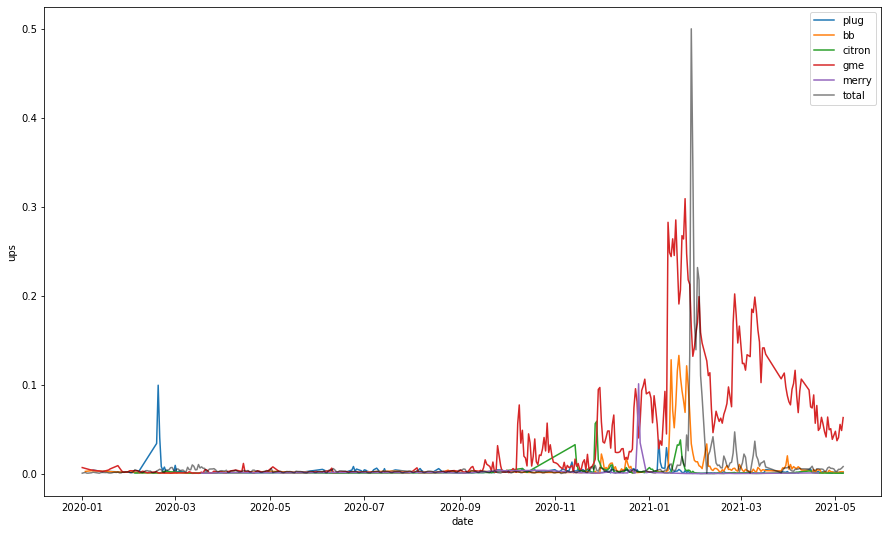

In [277]:

def new_persistent_memes(pop_words, pop_words_200, dates):
    delta = 1 #datetime.timedelta(days=1)
    meme_words = []
    for i in range(len(dates))[11:]:
        for word in pop_words.iloc[i]:
            if not any([word in set(pop_words_200.iloc[i - delta * k ]) for k in range(1,10) ]):
                if all([word in set(pop_words.iloc[i + delta * k ]) for k in range(1,3) ]):
                    print(i, dates[i], word)
                    meme_words.append(word)
                
    return meme_words 

persistent_meme_words = new_persistent_memes(pop_words, pop_words_200, dates)
plot_word_prop(wsb, list(set(persistent_meme_words)), statistic = "count")

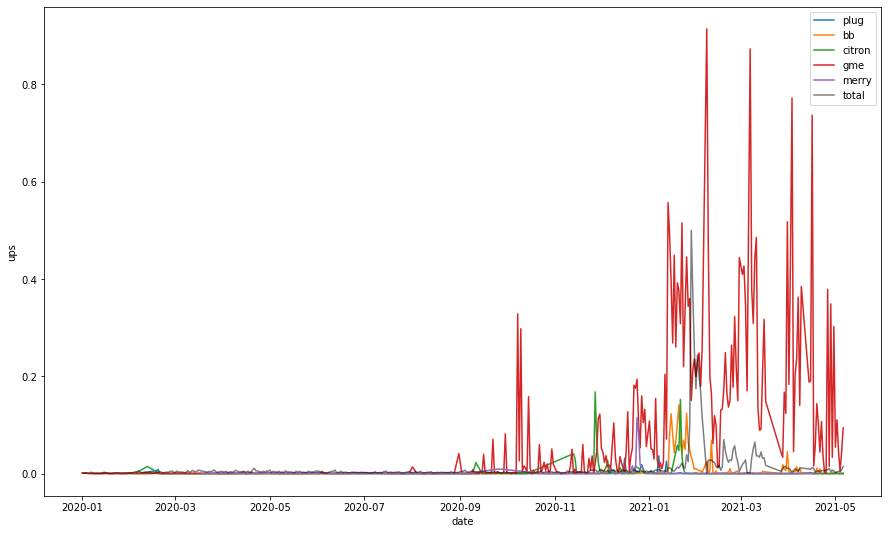

In [278]:
plot_word_prop(wsb, list(set(persistent_meme_words)), statistic = "sum")

,0
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
...,...
2021-05-02,0.0
2021-05-03,0.0
2021-05-04,0.0


In [417]:

def cluster_plot(wsb, keyword, statistic):
    wsb['contains_keyword'] =  wsb.tokenized_title.apply(lambda x : contains_word(x, keyword))

    agged_withgme = wsb[wsb.contains_keyword][['date', 'ups']].groupby("date").agg(statistic)

    agged_withoutgme = wsb[~wsb.contains_keyword][['date', 'ups']].groupby("date").agg(statistic)
    merged = agged_withgme.merge(agged_withoutgme, left_index = True, right_index = True, how= 'outer')
    merged['ups_x'] = merged.ups_x.fillna(0)
    agged = merged['ups_x']/(merged['ups_x'] + merged['ups_y'])
    agged_df = pd.DataFrame(agged)

    from sklearn.cluster import KMeans
    model = KMeans(n_clusters=2)
    model.fit(np.array(agged).reshape((-1,1)))
    agged_df['cluster'] = model.predict(np.array(agged).reshape((-1,1)))
    mean_zero_cluster = agged_df.groupby('cluster').agg('mean').iloc[0][0]
    mean_one_cluster = agged_df.groupby('cluster').agg('mean').iloc[1][0]
    agged_df['cluster'] = agged_df['cluster'].apply(lambda x :  {0 : mean_zero_cluster, 1 : mean_one_cluster}[x])
    #if mean_one_cluster < mean_zero_cluster:
    #    print(mean_one_cluster, mean_zero_cluster)
    #    agged_df['cluster'] = agged_df['cluster'].apply( lambda x : 1 - x)
    agged_df.groupby('cluster').agg('mean')
    fig, ax = plt.subplots(figsize=(15, 9))
    agged_df['rolling'] = agged_df[['cluster']].rolling(window = 30).mean()
    agged_df['rolling'].plot(ax = ax, label = "rolling")
    agged_df.cluster.plot(ax = ax, alpha = .5)
    agged_df[0].plot(ax = ax)
    plt.legend()
    #agged_df
    return agged_df

In [410]:
#cluster_plot(wsb, keyword = 'merry', statistic = 'sum')

In [411]:

#cluster_plot(wsb, keyword = 'amc', statistic = 'sum')

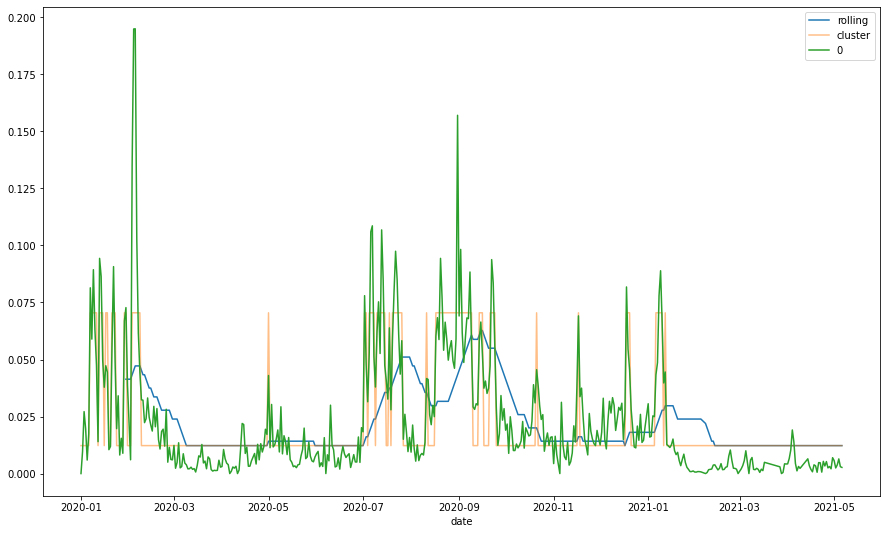

In [420]:

agged_df = cluster_plot(pd.DataFrame(wsb[wsb.date <= datetime.date(2021, 12, 30)]), keyword = 'tsla', statistic = 'count')

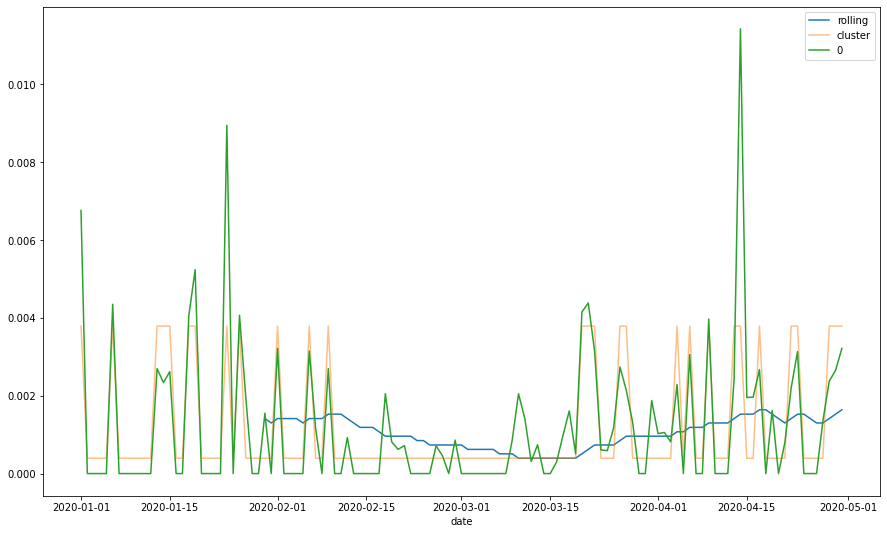

In [422]:

agged_df = cluster_plot(pd.DataFrame(wsb[wsb.date <= datetime.date(2020, 4, 30)]), keyword = 'gme', statistic = 'count')

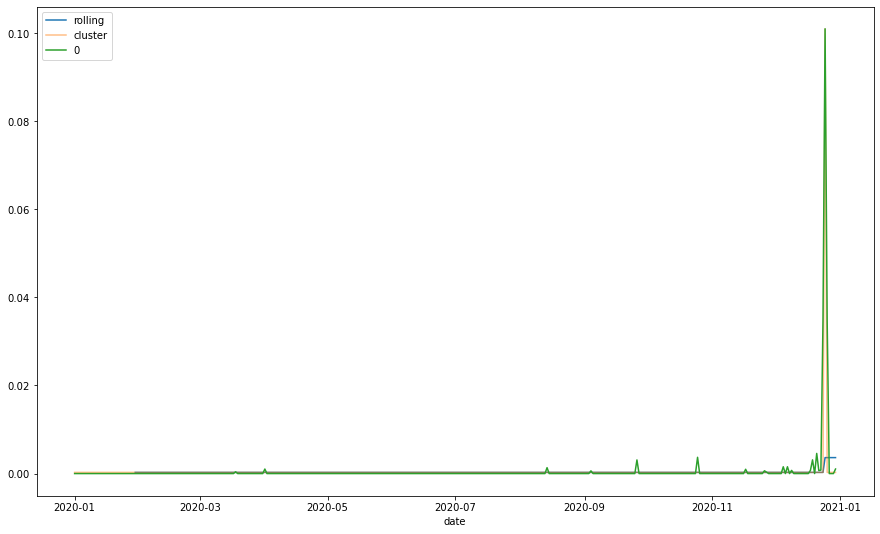

In [419]:

agged_df = cluster_plot(pd.DataFrame(wsb[wsb.date <= datetime.date(2020, 12, 30)]), keyword = 'merry', statistic = 'count')

In [375]:
agged_df.groupby('prediction').agg('mean').iloc[0]

0    0.000126
Name: 0, dtype: float64

In [423]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm
import theano.tensor as tt
import arviz as az
import seaborn as sns



<AxesSubplot:xlabel='date'>

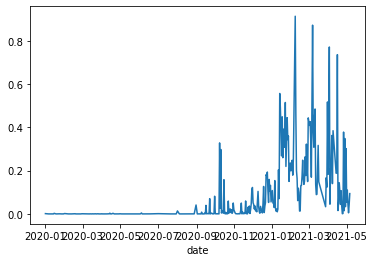

In [508]:
keyword = 'gme'
statistic = 'sum'

wsb['contains_keyword'] =  wsb.tokenized_title.apply(lambda x : contains_word(x, keyword))

agged_withgme = wsb[wsb.contains_keyword][['date', 'ups']].groupby("date").agg(statistic)

agged_withoutgme = wsb[~wsb.contains_keyword][['date', 'ups']].groupby("date").agg(statistic)
merged = agged_withgme.merge(agged_withoutgme, left_index = True, right_index = True, how= 'left')
#merged['ups_x'] = merged.ups_x.fillna(0)
agged = merged['ups_x']/(merged['ups_x'] + merged['ups_y'])


agged.dropna()
agged_df = pd.DataFrame(agged)

agged.plot()



In [514]:
agged_df = agged_df[agged_df[0] != 0]

In [517]:
agged_df[0]

date
2020-01-01    0.001374
2020-01-06    0.000024
2020-01-13    0.000054
2020-01-14    0.000028
2020-01-15    0.002768
                ...   
2021-05-02    0.110167
2021-05-03    0.046815
2021-05-04    0.005098
2021-05-05    0.043518
2021-05-06    0.093903
Name: 0, Length: 305, dtype: float64

In [524]:
observations = list(agged_df[0])
num_observation = len(observations)

with pm.Model() as model:
    mu = np.mean(observations)
    var = np.var(observations)
    alpha = 1 #((1 - mu) / var - 1 / mu) * (mu**2)
    beta = 1 #alpha * (1 / mu - 1)
    #https://stats.stackexchange.com/questions/12232/calculating-the-parameters-of-a-beta-distribution-using-the-mean-and-variance
    
    alpha_1 = pm.Exponential("alpha_1", 1/alpha)
    beta_1 = pm.Exponential("beta_1", 1/beta)
    alpha_2 = pm.Exponential("alpha_2", 1/alpha)
    beta_2 = pm.Exponential("beta_2", 1/beta)

    tau = pm.Uniform("tau", lower=0, upper= num_observation - 1)
    
    idx = np.arange(num_observation) # Index
    
    alpha_ = pm.math.switch( idx < tau, alpha_1, alpha_2)
    beta_ = pm.math.switch( idx < tau, beta_1, beta_2)
    observation = pm.Beta("obs", alpha = alpha_, beta = beta_, observed=observations)
    # You can't have observations with value zero
    #step = pm.Metropolis()
    trace = pm.sample(5000, tune=5000)#, step = step)

<ipython-input-524-cfddb648e72d>:25: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, tune=5000)#, step = step)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, beta_2, alpha_2, beta_1, alpha_1]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 384 seconds.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\lnajt\anaconda3\envs\ML\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha_1'}>,
        <AxesSubplot:title={'center':'alpha_1'}>],
       [<AxesSubplot:title={'center':'beta_1'}>,
        <AxesSubplot:title={'center':'beta_1'}>],
       [<AxesSubplot:title={'center':'alpha_2'}>,
        <AxesSubplot:title={'center':'alpha_2'}>],
       [<AxesSubplot:title={'center':'beta_2'}>,
        <AxesSubplot:title={'center':'beta_2'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'tau'}>]], dtype=object)

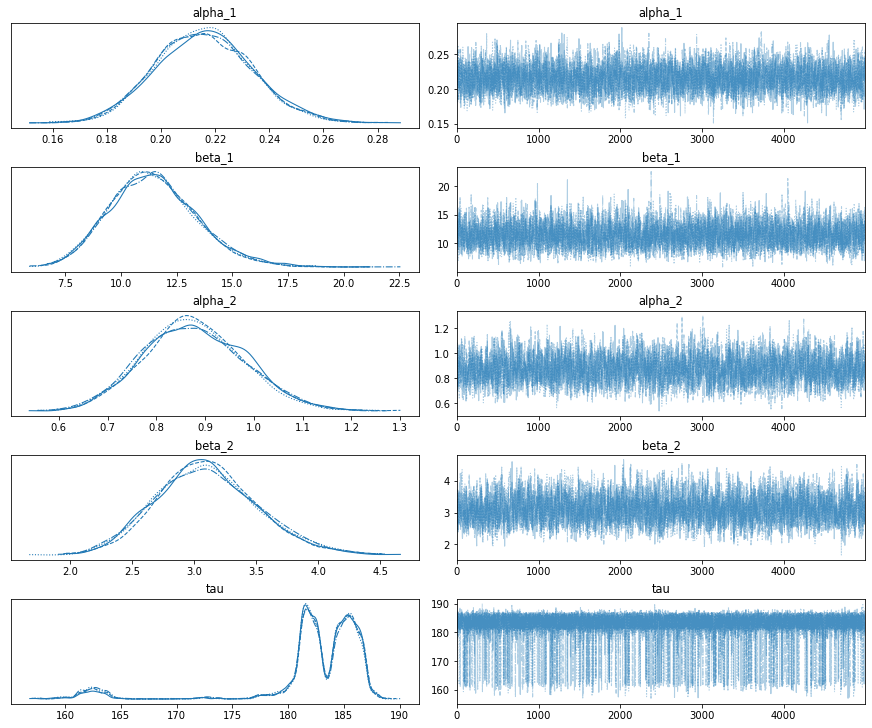

In [525]:
az.plot_trace(trace)

In [ ]:
# Plot entropy of the word frequencies as a time series?

In [529]:
tau_ints = [ int(x) for x in trace['tau']]

In [544]:
from collections import defaultdict

t_dict = pd.Series(tau_ints).value_counts()
for x in range(len(agged_df)):
    if x not in t_dict.keys():
        t_dict[x] = 0

In [542]:
agged_df['tau'] = np.zeros(len(agged_df))

<ipython-input-542-bef786e7f6ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agged_df['tau'] = np.zeros(len(agged_df))


In [543]:
agged_df['tau'] = [tau_counts[x] for x in range(len(agged_df))]

TypeError: <lambda>() missing 1 required positional argument: 'x'